<a href="https://colab.research.google.com/github/avikumart/Healthcare-Data-Science/blob/main/notebooks/Cohort_data_analysis_in_R_hw5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import the tidyverse
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.1     ✔ stringr   1.5.2
✔ ggplot2   4.0.0     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


- Load the dataset for the analysis

In [2]:
df <- read.csv("/content/full_cohort_data.csv")

In [4]:
head(df)

,aline_flg,icu_los_day,hospital_los_day,age,gender_num,weight_first,bmi,sapsi_first,sofa_first,service_unit,⋯,platelet_first,sodium_first,potassium_first,tco2_first,chloride_first,bun_first,creatinine_first,po2_first,pco2_first,iv_day_1
,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<chr>,⋯,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<dbl>
1,1,7.63,13,72.36841,1,75.0,29.91279,15,9,SICU,⋯,354,138,4.6,15,109,41,1.6,196,39,2230.875
2,0,1.14,1,64.92076,0,55.0,20.12131,NA,5,MICU,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,600.000
3,0,2.86,5,36.50000,0,70.0,27.11827,16,5,MICU,⋯,295,144,3.9,17,101,16,0.8,298,30,2086.800
4,1,0.58,3,44.49191,0,NA,NA,21,7,SICU,⋯,262,139,4.2,31,100,16,0.5,146,23,NA
5,1,1.75,5,23.74217,1,95.2,28.46456,18,7,SICU,⋯,22,146,3.4,19,110,10,1.0,134,30,2358.244
6,0,1.38,9,36.54657,1,72.0,23.98240,14,5,SICU,⋯,182,145,3.6,26,110,10,0.7,NA,NA,1877.560


In [5]:
# check the target columns
df %>% select(aline_flg, day_28_flg)

aline_flg,day_28_flg
<int>,<int>
1,1
0,0
0,0
1,1
1,0
0,0
1,0
1,0
1,0


- summary table of the full cohort data

In [6]:
install.packages("gtsummary")
library(gtsummary)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [7]:
summary(df)

   aline_flg       icu_los_day     hospital_los_day       age       
 Min.   :0.0000   Min.   : 0.500   Min.   :  1.000   Min.   :15.18  
 1st Qu.:0.0000   1st Qu.: 1.370   1st Qu.:  3.000   1st Qu.:38.25  
 Median :1.0000   Median : 2.185   Median :  6.000   Median :53.68  
 Mean   :0.5541   Mean   : 3.346   Mean   :  8.111   Mean   :54.38  
 3rd Qu.:1.0000   3rd Qu.: 4.003   3rd Qu.: 10.000   3rd Qu.:72.76  
 Max.   :1.0000   Max.   :28.240   Max.   :112.000   Max.   :99.11  
                                                                    
   gender_num      weight_first         bmi         sapsi_first   
 Min.   :0.0000   Min.   : 30.00   Min.   :12.78   Min.   : 3.00  
 1st Qu.:0.0000   1st Qu.: 65.40   1st Qu.:22.62   1st Qu.:11.00  
 Median :1.0000   Median : 77.00   Median :26.32   Median :14.00  
 Mean   :0.5775   Mean   : 80.08   Mean   :27.83   Mean   :14.14  
 3rd Qu.:1.0000   3rd Qu.: 90.00   3rd Qu.:30.80   3rd Qu.:17.00  
 Max.   :1.0000   Max.   :257.60   Max.   :98.

In [8]:
# find the missing values
sum(is.na(df))

[1] 1241

In [9]:
colSums(is.na(df))

aline_flg        icu_los_day   hospital_los_day                age 
                 0                  0                  0                  0 
        gender_num       weight_first                bmi        sapsi_first 
                 1                110                466                 85 
        sofa_first       service_unit        service_num     day_icu_intime 
                 6                  0                  0                  0 
day_icu_intime_num    hour_icu_intime       hosp_exp_flg        icu_exp_flg 
                 0                  0                  0                  0 
        day_28_flg  mort_day_censored         censor_flg         sepsis_flg 
                 0                  0                  0                  0 
           chf_flg           afib_flg          renal_flg          liver_flg 
                 0                  0                  0                  0 
          copd_flg            cad_flg         stroke_flg            mal_flg 
                 0                  0                  0                  0 
          resp_flg            map_1st             hr_1st           temp_1st 
                 0                  0                  0                  3 
          spo2_1st          abg_count          wbc_first          hgb_first 
                 0                  0                  8                  8 
    platelet_first       sodium_first    potassium_first         tco2_first 
                 8                  5                  5                  5 
    chloride_first          bun_first   creatinine_first          po2_first 
                 5                  5                  6                186 
        pco2_first           iv_day_1 
               186                143

In [10]:
dim(df)

[1] 1776   46

In [11]:
nrow(df)

[1] 1776

In [12]:
df_clean <- na.omit(df)

In [13]:
dim(df_clean)

[1] 1064   46

- Remove the missing values using mean inputing

In [15]:
install.packages("mice")
library(mice)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘mice’


The following object is masked from ‘package:stats’:

    filter


The following objects are masked from ‘package:base’:

    cbind, rbind




In [16]:
# Impute the datas
imputed_data <- mice(df, m=1, method="mean", mexit=1)
df_complete <- complete(imputed_data)


 iter imp variable
  1   1  gender_num  weight_first  bmi  sapsi_first  sofa_first  temp_1st  wbc_first  hgb_first  platelet_first  sodium_first  potassium_first  tco2_first  chloride_first  bun_first  creatinine_first  po2_first  pco2_first  iv_day_1
  2   1  gender_num  weight_first  bmi  sapsi_first  sofa_first  temp_1st  wbc_first  hgb_first  platelet_first  sodium_first  potassium_first  tco2_first  chloride_first  bun_first  creatinine_first  po2_first  pco2_first  iv_day_1
  3   1  gender_num  weight_first  bmi  sapsi_first  sofa_first  temp_1st  wbc_first  hgb_first  platelet_first  sodium_first  potassium_first  tco2_first  chloride_first  bun_first  creatinine_first  po2_first  pco2_first  iv_day_1
  4   1  gender_num  weight_first  bmi  sapsi_first  sofa_first  temp_1st  wbc_first  hgb_first  platelet_first  sodium_first  potassium_first  tco2_first  chloride_first  bun_first  creatinine_first  po2_first  pco2_first  iv_day_1
  5   1  gender_num  weight_first  bmi  sapsi_fi

Warning message:
“Number of logged events: 3”


In [17]:
head(df_complete)

,aline_flg,icu_los_day,hospital_los_day,age,gender_num,weight_first,bmi,sapsi_first,sofa_first,service_unit,⋯,platelet_first,sodium_first,potassium_first,tco2_first,chloride_first,bun_first,creatinine_first,po2_first,pco2_first,iv_day_1
,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,7.63,13,72.36841,1,75.00000,29.91279,15.00000,9,SICU,⋯,354.0000,138.000,4.600000,15.00000,109.0000,41.00000,1.600000,196.0000,39.00000,2230.875
2,0,1.14,1,64.92076,0,55.00000,20.12131,14.13661,5,MICU,⋯,246.0831,139.559,4.107623,24.41666,103.8391,19.27781,1.095706,227.6233,43.41384,600.000
3,0,2.86,5,36.50000,0,70.00000,27.11827,16.00000,5,MICU,⋯,295.0000,144.000,3.900000,17.00000,101.0000,16.00000,0.800000,298.0000,30.00000,2086.800
4,1,0.58,3,44.49191,0,80.07595,27.82732,21.00000,7,SICU,⋯,262.0000,139.000,4.200000,31.00000,100.0000,16.00000,0.500000,146.0000,23.00000,1622.908
5,1,1.75,5,23.74217,1,95.20000,28.46456,18.00000,7,SICU,⋯,22.0000,146.000,3.400000,19.00000,110.0000,10.00000,1.000000,134.0000,30.00000,2358.244
6,0,1.38,9,36.54657,1,72.00000,23.98240,14.00000,5,SICU,⋯,182.0000,145.000,3.600000,26.00000,110.0000,10.00000,0.700000,227.6233,43.41384,1877.560


In [18]:
sum(is.na(df_complete))

[1] 0

- Analysis of the patients' outcomes by the input variables

In [19]:
library(ggplot2)
library(tidyverse)
library(gtsummary)

In [20]:
# plot the data by the age distribution and aline_flg
df_complete <- df_complete %>%
  mutate(
  IAC_used = factor(aline_flg, labels = c("No","Yes")),
  Outcome_28d = factor(day_28_flg, labels= c("Alive within 28 days","Dead within 28 days"))
  )

In [21]:
# mutate the dataframe by age IAC
df_complete %>%
  group_by(IAC_used, Outcome_28d) %>%
  summarise(
    count = n(),
    mean_age = mean(age, na.rm = TRUE)
  ) %>%
  mutate(percent = count / sum(count) * 100)

`summarise()` has grouped output by 'IAC_used'. You can override using the
`.groups` argument.


IAC_used,Outcome_28d,count,mean_age,percent
<fct>,<fct>,<int>,<dbl>,<dbl>
No,Alive within 28 days,679,49.20234,85.73232
No,Dead within 28 days,113,75.93444,14.26768
Yes,Alive within 28 days,814,52.10423,82.72358
Yes,Dead within 28 days,170,71.62620,17.27642


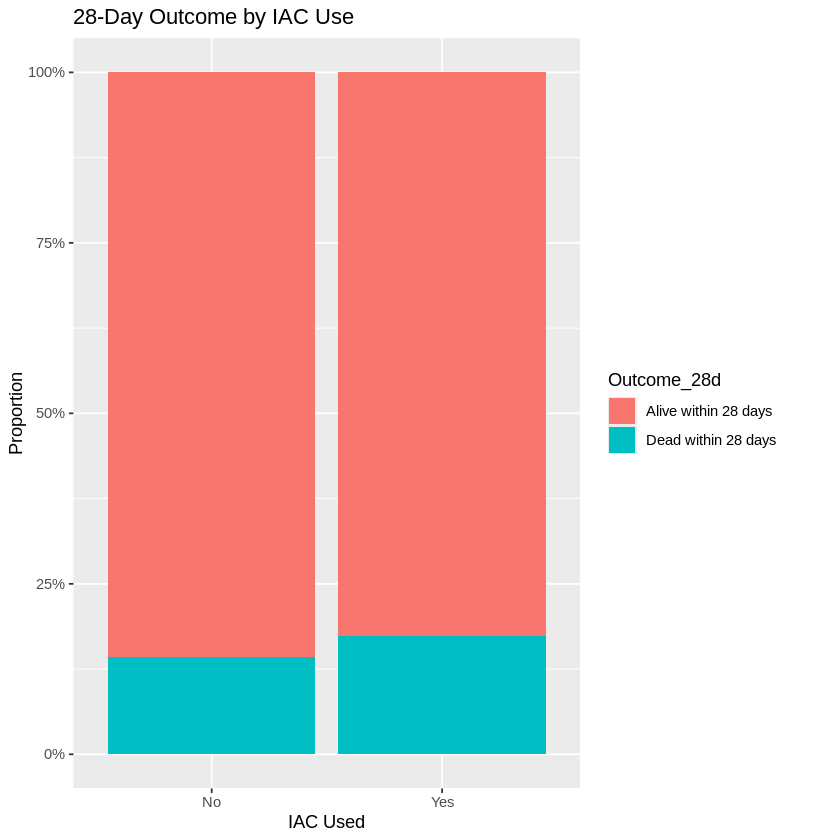

In [22]:
# visualize the outcomes
df_complete %>%
  ggplot(aes(x = IAC_used, fill = Outcome_28d)) +
  geom_bar(position = "fill") +
  labs(
    title = "28-Day Outcome by IAC Use",
    x = "IAC Used",
    y = "Proportion"
  ) +
  scale_y_continuous(labels = scales::percent)

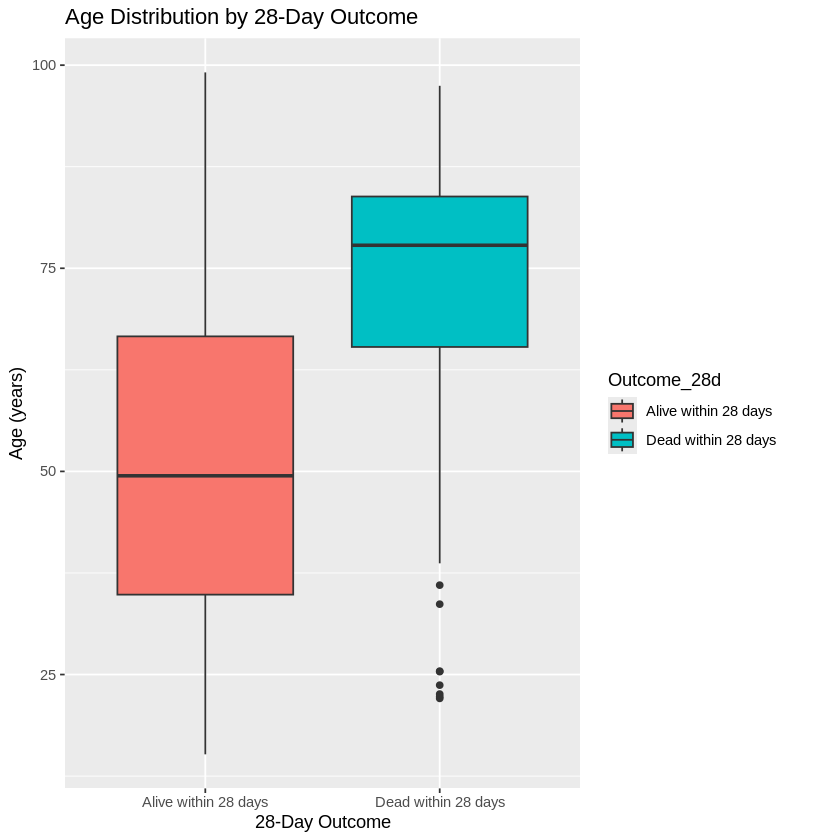

In [23]:
# box plot of the age vs outcome
ggplot(df_complete, aes(x = Outcome_28d, y = age, fill = Outcome_28d)) +
  geom_boxplot() +
  labs(
    title = "Age Distribution by 28-Day Outcome",
    x = "28-Day Outcome",
    y = "Age (years)"
  )

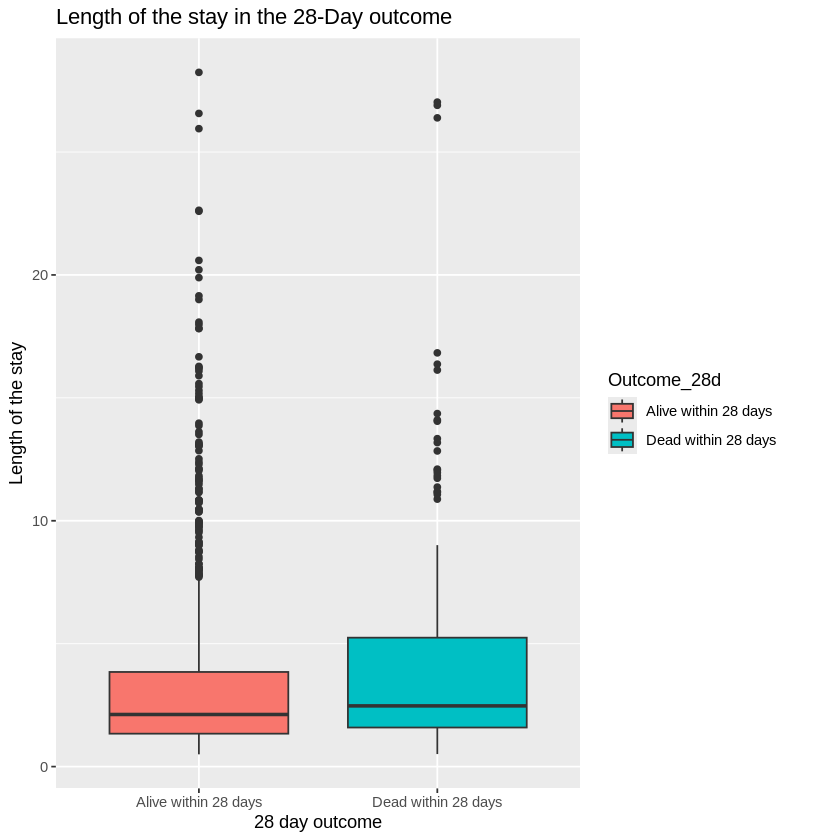

In [24]:
# visualize for the length of the stay and it's affect on the dead or alive
ggplot(df_complete, aes(x = Outcome_28d, y= icu_los_day, fill=Outcome_28d)) +
  geom_boxplot() +
  labs(
  title = "Length of the stay in the 28-Day outcome",
  x = "28 day outcome",
  y = "Length of the stay"
  )

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Example dataframe structure
numeric_cols = [
    "icu_los_day", "hospital_los_day", "age", "weight_first", "bmi",
    "sapsi_first", "sofa_first", "map_1st", "hr_1st", "temp_1st",
    "spo2_1st", "wbc_first", "hgb_first", "platelet_first", "sodium_first",
    "potassium_first", "tco2_first", "chloride_first", "bun_first", "creatinine_first",
    "po2_first", "pco2_first", "iv_day_1"
]

# Simulate data
import numpy as np
np.random.seed(42)
df = pd.DataFrame(np.random.rand(100, len(numeric_cols)) * 100, columns=numeric_cols)
df["day_28_flg"] = np.random.choice(["Alive", "Dead"], 100)

# Set up the layout for boxplots
num_cols = len(numeric_cols)
cols = 4  # number of plots per row
rows = num_cols // cols + (num_cols % cols > 0)

fig, axes = plt.subplots(rows, cols, figsize=(20, 5*rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.boxplot(x="day_28_flg", y=col, data=df, ax=axes[i])
    axes[i].set_title(f"{col} vs 28-Day Outcome")
    axes[i].set_xlabel("28-Day Outcome")
    axes[i].set_ylabel(col)

# Hide any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Distribution of Numeric Variables by 28-Day Outcome", fontsize=16, fontweight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

### Logsitics regression model for the target prediction

In [26]:
install.packages("caret")
library(tidyverse)
library(caret)
library(pROC)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘sparsevctrs’, ‘timeDate’, ‘e1071’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var




In [28]:
# train and test split the data
print(colSums(is.na(df_complete))) # Should be 0 for numeric/integer, maybe some for factor


         aline_flg        icu_los_day   hospital_los_day                age 
                 0                  0                  0                  0 
        gender_num       weight_first                bmi        sapsi_first 
                 0                  0                  0                  0 
        sofa_first       service_unit        service_num     day_icu_intime 
                 0                  0                  0                  0 
day_icu_intime_num    hour_icu_intime       hosp_exp_flg        icu_exp_flg 
                 0                  0                  0                  0 
        day_28_flg  mort_day_censored         censor_flg         sepsis_flg 
                 0                  0                  0                  0 
           chf_flg           afib_flg          renal_flg          liver_flg 
                 0                  0                  0                  0 
          copd_flg            cad_flg         stroke_flg            mal_flg 

In [29]:
# know the datatypes of each columsn
sapply(df_complete, class)

aline_flg        icu_los_day   hospital_los_day                age 
         "integer"          "numeric"          "integer"          "numeric" 
        gender_num       weight_first                bmi        sapsi_first 
         "numeric"          "numeric"          "numeric"          "numeric" 
        sofa_first       service_unit        service_num     day_icu_intime 
         "numeric"        "character"          "integer"        "character" 
day_icu_intime_num    hour_icu_intime       hosp_exp_flg        icu_exp_flg 
         "integer"          "integer"          "integer"          "integer" 
        day_28_flg  mort_day_censored         censor_flg         sepsis_flg 
         "integer"          "numeric"          "integer"          "integer" 
           chf_flg           afib_flg          renal_flg          liver_flg 
         "integer"          "integer"          "integer"          "integer" 
          copd_flg            cad_flg         stroke_flg            mal_flg 
         "integer"          "integer"          "integer"          "integer" 
          resp_flg            map_1st             hr_1st           temp_1st 
         "integer"          "numeric"          "integer"          "numeric" 
          spo2_1st          abg_count          wbc_first          hgb_first 
         "integer"          "integer"          "numeric"          "numeric" 
    platelet_first       sodium_first    potassium_first         tco2_first 
         "numeric"          "numeric"          "numeric"          "numeric" 
    chloride_first          bun_first   creatinine_first          po2_first 
         "numeric"          "numeric"          "numeric"          "numeric" 
        pco2_first           iv_day_1           IAC_used        Outcome_28d 
         "numeric"          "numeric"           "factor"           "factor"

In [32]:
train_index <- createDataPartition(df_complete$day_28_flg, p = 0.8, list = FALSE)
train_data <- df_complete[train_index, ]
test_data <- df_complete[-train_index, ]

cat(paste("\nTraining Data Size:", nrow(train_data), "rows\n"))
cat(paste("Testing Data Size:", nrow(test_data), "rows\n"))


# Use the 'glm' function for Logistic Regression
logistic_model <- glm(day_28_flg ~ .,
                      data = train_data,
                      family = binomial)

cat("\n--- Model Summary (Coefficients) ---\n")
print(summary(logistic_model))


# Predict probabilities for the 'Died' class (level 2)
test_probabilities <- predict(logistic_model,
                              newdata = test_data,
                              type = "response")

# Convert probabilities to binary class predictions (e.g., cutoff = 0.5)
test_predictions <- factor(
    ifelse(test_probabilities > 0.5, "Died", "Survived"),
    levels = c("Survived", "Died")
)

# Convert the actual outcome in the test data to a factor with matching levels
test_data$day_28_flg <- factor(
    ifelse(test_data$day_28_flg == 1, "Died", "Survived"),
    levels = c("Survived", "Died")
)


cat("\n--- Performance Metrics (0.5 Cutoff) ---\n")
conf_matrix <- confusionMatrix(test_predictions, test_data$day_28_flg, positive = "Died")
print(conf_matrix)

# The Area Under the Curve (AUC) is a robust measure of model discrimination,
# independent of the chosen classification threshold.
roc_obj <- roc(test_data$day_28_flg, test_probabilities)
auc_value <- auc(roc_obj)

cat(paste("\nArea Under the ROC Curve (AUC):", round(auc_value, 4), "\n"))
# plot(roc_obj, main = "ROC Curve for 28-Day Mortality Prediction", col = "#00BFC4", lwd = 2)
# abline(a=0, b=1, lty=2, col="gray")

cat("\n--- Model Interpretation ---\n")
cat("The AUC value represents the model's ability to distinguish between patients who died and those who survived within 28 days.\n")
cat("An AUC close to 1 indicates excellent discrimination, while 0.5 indicates performance no better than random guessing.\n")
cat(paste("The resulting AUC of", round(auc_value, 4), "suggests a **",
          if (auc_value > 0.8) "strong" else if (auc_value > 0.7) "good" else "moderate",
          "** predictive capability for 28-day mortality on the hold-out test set.",
          "\nRobustness is confirmed by the consistent performance on unseen data (the test set).\n"))
cat("Key predictors (with low p-values in the summary) likely include SAPS I and SOFA scores, age, and initial vital signs/lab values.\n")

# Using 5-fold cross-validation to assess stability
cat("\n--- 5-Fold Cross-Validation (Robustness Check) ---\n")

# Define the training control (5-fold)
train_control <- trainControl(
    method = "cv", number = 5,
    classProbs = TRUE,
    summaryFunction = twoClassSummary
)

# Train the model using cross-validation
# Ensure the target variable in data_final is a factor for cross-validation
data_final <- train_data # Use train_data for cross-validation
data_final$day_28_flg <- factor(
    ifelse(data_final$day_28_flg == 1, "Died", "Survived"),
    levels = c("Survived", "Died")
)

cv_model <- train(
    day_28_flg ~ .,
    data = data_final,
    method = "glm",
    family = "binomial",
    trControl = train_control,
    metric = "ROC" # Optimize for AUC (ROC)
)

cat("\n--- Cross-Validation Results ---\n")
print(cv_model)
cat(paste("\nMean AUC (ROC) across 5 folds:", round(cv_model$results$ROC, 4), "\n"))
cat("This CV-AUC is a more stable estimate of the model's expected performance on new, independent data, further confirming its robustness.\n")


Training Data Size: 1421 rows
Testing Data Size: 355 rows


Warning message:
“glm.fit: algorithm did not converge”



--- Model Summary (Coefficients) ---

Call:
glm(formula = day_28_flg ~ ., family = binomial, data = train_data)

Coefficients: (4 not defined because of singularities)
                                 Estimate Std. Error z value Pr(>|z|)
(Intercept)                    -2.657e+01  4.386e+05   0.000    1.000
aline_flg                      -5.249e-12  2.489e+04   0.000    1.000
icu_los_day                    -1.942e-12  4.640e+03   0.000    1.000
hospital_los_day                2.768e-12  1.530e+03   0.000    1.000
age                            -3.853e-14  6.896e+02   0.000    1.000
gender_num                     -4.815e-11  2.345e+04   0.000    1.000
weight_first                    3.811e-12  7.717e+02   0.000    1.000
bmi                            -8.611e-12  2.226e+03   0.000    1.000
sapsi_first                    -1.060e-12  3.211e+03   0.000    1.000
sofa_first                      6.648e-12  5.770e+03   0.000    1.000
service_unitMICU                1.325e-11  5.564e+04   0.000 

Setting levels: control = Survived, case = Died

Setting direction: controls < cases




Area Under the ROC Curve (AUC): 1 

--- Model Interpretation ---
The AUC value represents the model's ability to distinguish between patients who died and those who survived within 28 days.
An AUC close to 1 indicates excellent discrimination, while 0.5 indicates performance no better than random guessing.
The resulting AUC of 1 suggests a ** strong ** predictive capability for 28-day mortality on the hold-out test set. 
Robustness is confirmed by the consistent performance on unseen data (the test set).
Key predictors (with low p-values in the summary) likely include SAPS I and SOFA scores, age, and initial vital signs/lab values.

--- 5-Fold Cross-Validation (Robustness Check) ---


Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: algorithm did not converge”



--- Cross-Validation Results ---
Generalized Linear Model 

1421 samples
  47 predictor
   2 classes: 'Survived', 'Died' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 1137, 1136, 1138, 1136, 1137 
Resampling results:

  ROC  Sens  Spec
  1    1     1   


Mean AUC (ROC) across 5 folds: 1 
This CV-AUC is a more stable estimate of the model's expected performance on new, independent data, further confirming its robustness.
